<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8/03_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fish=pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input=fish.values[:,1:]

In [5]:
print(fish_input[:5])

[[242.0 25.4 30.0 11.52 4.02]
 [290.0 26.3 31.2 12.48 4.3056]
 [340.0 26.5 31.1 12.3778 4.6961]
 [363.0 29.0 33.5 12.73 4.4555]
 [430.0 29.0 34.0 12.444 5.134]]


In [6]:
fish_target=fish['Species'].to_numpy()

print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [7]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [8]:
#StandardScaler 로 데이터 전처리
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scale=ss.transform(train_input)
test_scale=ss.transform(test_input)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)

kn.fit(train_scale,train_target)
print(kn.score(train_scale,train_target))
print(kn.score(test_scale,test_target))

0.8907563025210085
0.85


In [10]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
print(kn.predict(test_scale[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [12]:
proba=kn.predict_proba(test_scale[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


#sigmoid function (logistic function)

$$ \phi = {1\over 1+e^{-x}}  $$

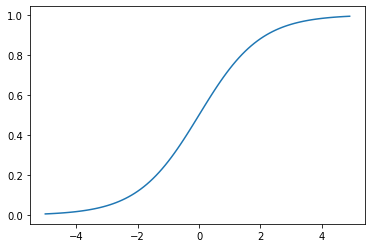

In [13]:
z=np.arange(-5,5,0.1)
phi=1/(1+np.exp(-z))
plt.plot(z,phi)
plt.show()

In [14]:
char_arr=np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [15]:
bream_smelt_indexes=(train_target=='Bream')|(train_target=='Smelt')
train_bream_smelt=train_scale[bream_smelt_indexes]
target_bream_smelt=train_target[bream_smelt_indexes]

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [17]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [18]:
print(lr.classes_)

['Bream' 'Smelt']


In [19]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [20]:
decisions=lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [22]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [23]:
#로지스틱 회귀로 다중분류 수행하기
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scale,train_target)
print(lr.score(train_scale,train_target))
print(lr.score(test_scale,test_target))

0.9327731092436975
0.925


In [25]:
print(lr.predict(test_scale[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [27]:
proba=lr.predict_proba(test_scale[:5])
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [28]:
print(lr.classes_)
print(lr.coef_.shape,lr.intercept_.shape)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)


In [31]:
decision=lr.decision_function(test_scale[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [33]:
from scipy.special import softmax
proba=softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
